In [126]:
import copy
import json
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

masking_prob = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

keys = [
    "$\mathcal{V}_{verb}$",
    "$\mathcal{V}_{symbol}$", 
    "$\mathcal{V}_{particle}$",
    "$\mathcal{V}_{noun}$",
    "$\mathcal{V}$",
    "$\mathcal{V}$ \\ $\mathcal{V}_{verb}$"
]

rate = {
    "$\mathcal{V}_{noun}$": 0.4354,
    "$\mathcal{V}_{particle}$": 0.2537,
    "$\mathcal{V}_{verb}$": 0.1134,
    "$\mathcal{V}_{symbol}$": 0.1178,
    "$\mathcal{V}$": 1,
    "$\mathcal{V}$ \\ $\mathcal{V}_{verb}$": 0.8866
}

result = {
    "$\mathcal{V}_{noun}$": [64.01, 64.06, 64.34, 64.62, 64.28, 64.47],
    "$\mathcal{V}_{particle}$": [63.63, 63.98, 64.31, 63.83, 64.03, 63.73],
    "$\mathcal{V}_{verb}$": [64.05, 64.15, 63.75, 63.72, 64.06, 64.13],
    "$\mathcal{V}_{symbol}$": [63.95, 63.82, 63.55, 63.69, 63.78, 64.12],
    "$\mathcal{V}$": [63.98, 64.23, 64.89, 63.85, 63.85, 63.24],
    "$\mathcal{V}$ \\ $\mathcal{V}_{verb}$": [64.00, 64.53, 65.02, 64.67, 63.97, 63.98]

}

results_for_plot = [pd.DataFrame({"masking probability over the whole vocabulary $\mathcal{V}$": [rate[key] * prob for prob in masking_prob], key: result[key]}) for key in keys]

In [142]:
markers = [".", "o", "v", "^", "D", "d", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "|", "_"]
markers = ["X", "o", "s", ".", "x", "+"]
colors = sns.color_palette("Paired")
# colors = ["green", "blue", "purple", "orange", "red", "magenta"]

sns.set()
sns.set_style("ticks")
sns.set_context("paper", 2.5)

fig, ax = plt.subplots(figsize=(20, 6.5))
ax.annotate('Baseline', xy=(0.45, 64.08), fontsize=20, color='black', bbox=dict(facecolor='white', alpha=1.0, edgecolor='black'))
ax.hlines(y=64.08, xmin=0, xmax=1, linestyle='dashed', color='black')

for idx, (df, marker, key, color) in enumerate(zip(results_for_plot, markers, keys, colors)):
#     ax = df.plot(ax=ax, x="masking probability over the whole vocabulary $\mathcal{V}$", marker=marker, markersize=10, label=key, color= sns.xkcd_rgb[color], lw=3)
    ax = df.plot(ax=ax, x="masking probability over the whole vocabulary $\mathcal{V}$", marker=marker, markersize=10, label=key, color=color, lw=3)
    ax.legend(loc="best", ncol=2, fontsize=20, columnspacing=0.5)



ax.tick_params(axis='both', length=0)
plt.ylabel('ZAR $\mathrm{F}_{1}$',fontsize=30)
sns.despine()

plt.savefig('fig.pdf', bbox_inches="tight", format="pdf", transparent=True)
plt.close('all')

In [1]:
result_file = "/Users/ryuto/lab/research/work/ACL2020/ntc/result.json"

In [2]:
import copy
import json
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
markers = [".", "o", "v", "^", "D", "d", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "|", "_"]

In [4]:
with open(result_file) as fi:
    loaded_results = json.load(fi)

In [5]:
results = [pd.DataFrame(v) for k, v in loaded_results.items() if k != "content" and k != "function"]

In [6]:
targets = ["noun", "particle", "verb", "symbol", "all", "all-verb"]
labels = ["$\mathcal{V}_{noun}$", "$\mathcal{V}_{particle}$", "$\mathcal{V}_{verb}$", "$\mathcal{V}_{symbol}$", "$\mathcal{V}$", "$\mathcal{V}$ \\ $\mathcal{V}_{verb}$"]
new_results = copy.deepcopy(results[0:5])
new_results += copy.deepcopy([results[-3]])
results = []
for df, target, label in zip(new_results, targets, labels):
    results += [pd.DataFrame({"masking probability over the whole vocabulary $\mathcal{V}$": df["random rate"], label: df[target]})]

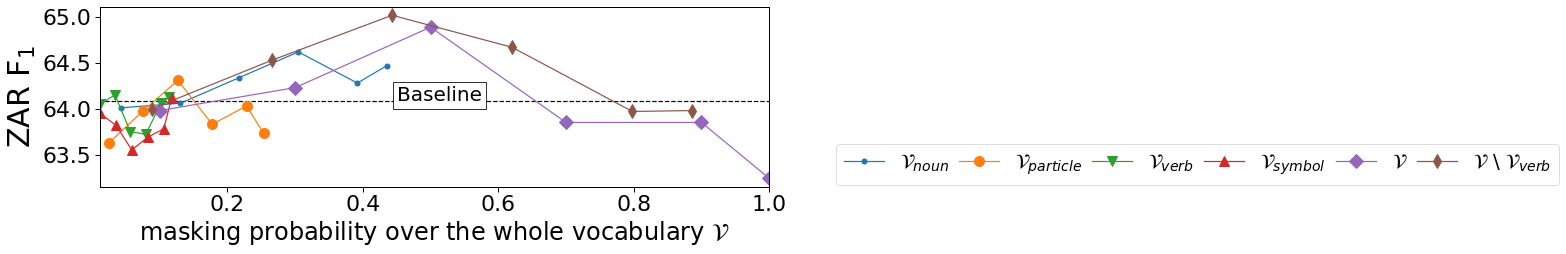

In [62]:
sns.set_context("paper", 2.5)
fig, ax = plt.subplots(figsize=(12, 3.3))
ax.annotate('Baseline', xy=(0.45, 64.08), fontsize=20, color='black', bbox=dict(facecolor='white', alpha=1.0, edgecolor='black'))
ax.hlines(y=64.08, xmin=0, xmax=1, linestyle='dashed', color='black')
for df, marker, label in zip(results, markers, labels):
    ax = df.plot(ax=ax, x="masking probability over the whole vocabulary $\mathcal{V}$", marker=marker, markersize=10, label=label)
    ax.legend(loc=(1.1, 0.01), ncol=6, fontsize=20, columnspacing=0.5)
plt.ylabel('ZAR $\mathrm{F}_{1}$',fontsize=30)
plt.savefig('/Users/ryuto/lab/research/work/ACL2020/ntc/fig.pdf', bbox_inches="tight", format="pdf")